In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df=pd.read_csv('Concrete.csv')
df

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
df.keys()

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age', 'CMS'],
      dtype='object')

In [5]:
df.Cement

0       540.0
1       540.0
2       332.5
3       332.5
4       198.6
        ...  
1025    276.4
1026    322.2
1027    148.5
1028    159.1
1029    260.9
Name: Cement, Length: 1030, dtype: float64

In [6]:
df.CMS

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: CMS, Length: 1030, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CA                1030 non-null   float64
 6   FA                1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CMS               1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
df.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
df.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

In [11]:
df.sample(5)

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
961,336.5,0.0,0.0,181.9,3.4,985.8,816.8,28,44.87
456,194.7,0.0,100.5,170.2,7.5,998.0,901.8,56,43.39
367,214.9,53.8,121.9,155.6,9.6,1014.3,780.6,56,53.96
910,144.0,136.0,106.0,178.0,7.0,941.0,774.0,28,26.14
151,401.8,94.7,0.0,147.4,11.4,946.8,852.1,56,73.70


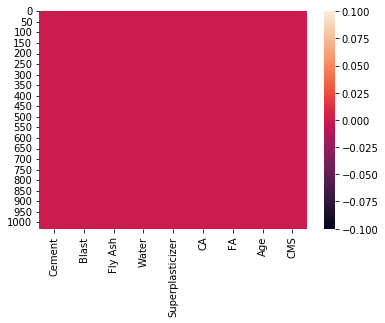

In [12]:
sns.heatmap(df.isnull())

In [13]:
dfcorr=df.corr()
dfcorr

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FA,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CMS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


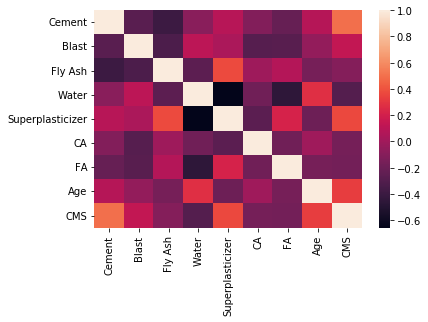

In [14]:
sns.heatmap(dfcorr)

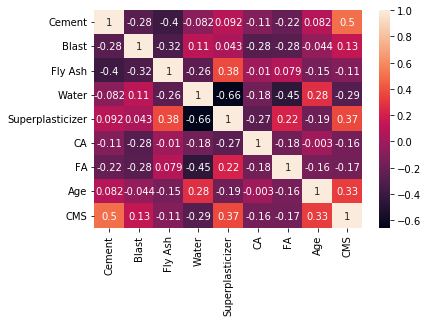

In [15]:
sns.heatmap(dfcorr, annot=True)

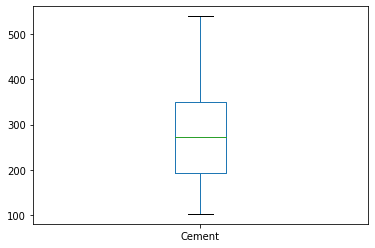

In [17]:
df['Cement'].plot.box()

Cement                 AxesSubplot(0.125,0.657941;0.227941x0.222059)
Blast               AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Fly Ash             AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Water                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Superplasticizer    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
CA                  AxesSubplot(0.672059,0.391471;0.227941x0.222059)
FA                        AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                    AxesSubplot(0.398529,0.125;0.227941x0.222059)
CMS                    AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

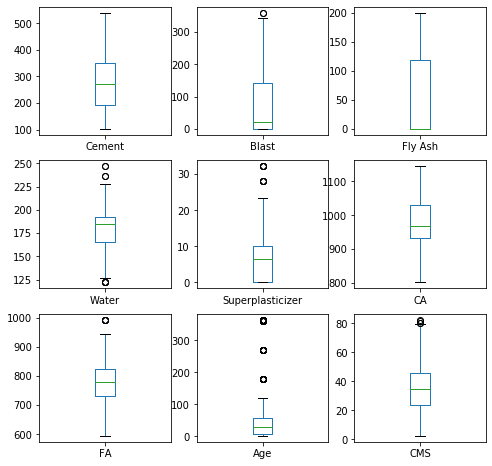

In [19]:
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025583D47E08>,
      dtype=object)

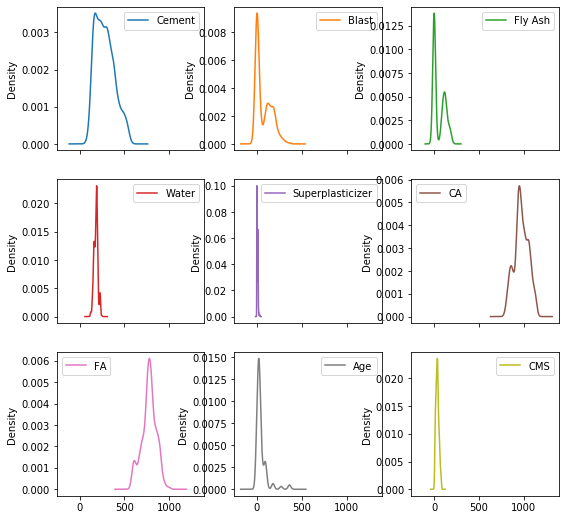

In [21]:
df.plot(kind='kde', subplots=True, layout=(3,3), figsize=(9,9))

C:\Users\Aamina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


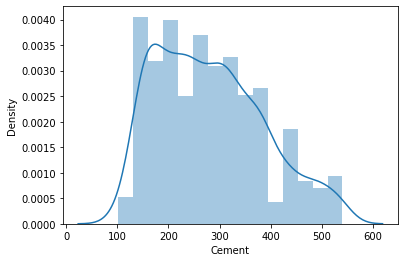

In [23]:
sns.distplot(df['Cement'])

C:\Users\Aamina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


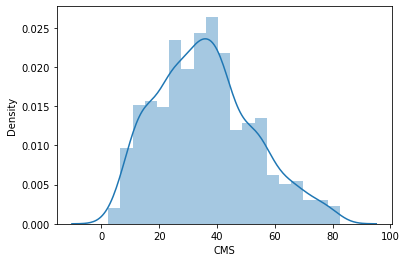

In [28]:
sns.distplot(df['CMS'])

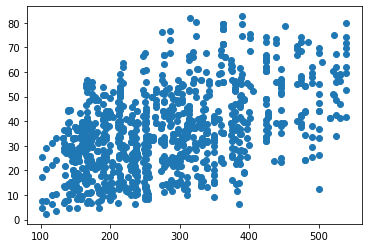

In [29]:
plt.scatter(df['Cement'], df['CMS'])

In [30]:
df.shape

(1030, 9)

In [33]:
x=df.iloc[:,0:-1]

In [34]:
x.shape

(1030, 8)

In [35]:
y=df.iloc[:,-1]

In [36]:
y.shape

(1030,)

In [38]:
y=y.values.reshape(-1,1)

In [39]:
y.shape

(1030, 1)

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.47791487, 0.85688789, 0.84714393, ..., 1.21767004, 0.27973311,
        2.64540763],
       [2.47791487, 0.85688789, 0.84714393, ..., 1.21767004, 0.27973311,
        1.56142148],
       [0.49142531, 0.79552649, 0.84714393, ..., 2.24091709, 3.55306569,
        0.26662698],
       ...,
       [1.27008832, 0.75957923, 0.85063487, ..., 0.0801067 , 0.27973311,
        0.72572939],
       [1.16860982, 1.30806485, 0.84714393, ..., 0.19116644, 0.27973311,
        0.18253855],
       [0.19403325, 0.30849909, 0.3769452 , ..., 0.15074782, 0.27973311,
        0.20469738]])

In [41]:
threshold=3
print(np.where(z>3))

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
        35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
       122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
       620, 622, 756, 769, 792, 798, 814, 820, 873, 936], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 3], dtype=int64))


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.45, random_state=45)

In [45]:
x_train.shape

(566, 8)

In [46]:
x_test.shape

(464, 8)

In [47]:
y_train.shape

(566, 1)

In [48]:
y_test.shape

(464, 1)

In [49]:
lm=LinearRegression()

In [50]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
lm.coef_

array([[ 0.11043771,  0.08787694,  0.08221264, -0.18020126,  0.31260241,
         0.0049484 ,  0.01032844,  0.12524975]])

In [53]:
lm.intercept_

array([6.14162376])

In [54]:
pred=lm.predict(x_test)
pred

array([[19.02834956],
       [14.24380873],
       [28.77529312],
       [55.39850648],
       [33.33240778],
       [31.72559605],
       [17.37505244],
       [36.71902283],
       [29.70413521],
       [22.15921192],
       [62.07808452],
       [25.6733604 ],
       [17.12186874],
       [19.79884103],
       [18.16680197],
       [34.17494708],
       [57.45279685],
       [18.229856  ],
       [48.01700058],
       [43.11882826],
       [35.61780665],
       [28.08592455],
       [37.19746207],
       [43.71516564],
       [50.06381666],
       [69.0464097 ],
       [23.77702735],
       [40.49164628],
       [30.736429  ],
       [30.63153585],
       [23.5037451 ],
       [19.52682728],
       [31.87391959],
       [49.61956558],
       [50.94897347],
       [36.96967292],
       [20.90939708],
       [29.69015526],
       [35.94467352],
       [21.71119772],
       [28.68236863],
       [30.14198178],
       [23.3746148 ],
       [51.12924221],
       [26.684443  ],
       [36

In [55]:
print("Predicted Value:", pred)
print("Actual Value", y_test)

Predicted Value: [[19.02834956]
 [14.24380873]
 [28.77529312]
 [55.39850648]
 [33.33240778]
 [31.72559605]
 [17.37505244]
 [36.71902283]
 [29.70413521]
 [22.15921192]
 [62.07808452]
 [25.6733604 ]
 [17.12186874]
 [19.79884103]
 [18.16680197]
 [34.17494708]
 [57.45279685]
 [18.229856  ]
 [48.01700058]
 [43.11882826]
 [35.61780665]
 [28.08592455]
 [37.19746207]
 [43.71516564]
 [50.06381666]
 [69.0464097 ]
 [23.77702735]
 [40.49164628]
 [30.736429  ]
 [30.63153585]
 [23.5037451 ]
 [19.52682728]
 [31.87391959]
 [49.61956558]
 [50.94897347]
 [36.96967292]
 [20.90939708]
 [29.69015526]
 [35.94467352]
 [21.71119772]
 [28.68236863]
 [30.14198178]
 [23.3746148 ]
 [51.12924221]
 [26.684443  ]
 [36.74411309]
 [48.51799957]
 [64.16006075]
 [34.73030856]
 [41.3252775 ]
 [67.24448459]
 [34.36011014]
 [44.087104  ]
 [40.15993302]
 [30.49617235]
 [31.27357796]
 [33.31369205]
 [29.14507251]
 [34.86276333]
 [48.79104033]
 [17.67200257]
 [27.98687564]
 [42.64539798]
 [22.51044219]
 [53.00224482]
 [ 9.489

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [58]:
print("Mean Absolute Error:", mean_absolute_error(y_test, pred))
print("Mean Squared Error:", mean_squared_error(y_test, pred))

Mean Absolute Error: 7.930950387458477
Mean Squared Error: 105.09780676659271


In [59]:
from sklearn.metrics import r2_score

In [60]:
print("R2 Score:",r2_score(y_test, pred))

R2 Score: 0.6196275602930954
